In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 

In [ ]:
#from https://github.com/sidmitra/osmnx_playground

dist = 4*805 # radius in meters(approx 2 miles)
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

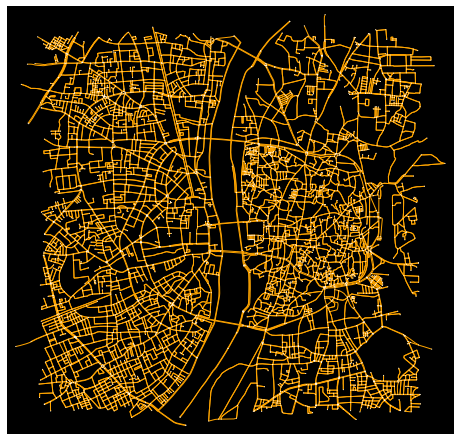

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [20]:
name, point = places[6]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

In [21]:
print(len(G.nodes()), len(G.edges()))

5308 13020


In [22]:
list(G.nodes())[0]

245711252

In [23]:
origin = list(G.nodes())[0]
destination = list(G.nodes())[1000]
shortest_path = nx.shortest_path(G, origin, destination)

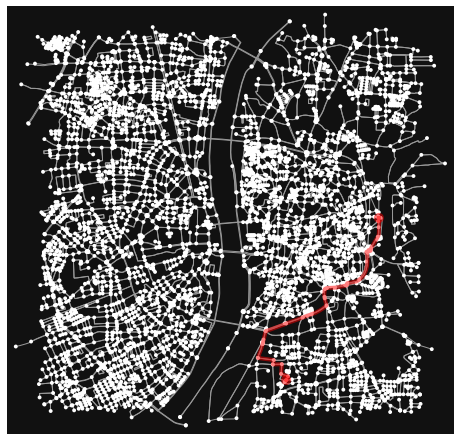

In [24]:
fig, ax = ox.plot_graph_route(G, shortest_path)

In [47]:

# https://github.com/booklover98/A-star-Pathfinding

Chennai = (13.0827, 80.2707)
G = ox.graph_from_point(Chennai, dist=2000)
start = ox.geocode(' Adyar, Chennai, India')
end = ox.geocode(' Mylapore, Chennai, India')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
30037235,13.080784,80.265167,traffic_signals,4,POINT (80.26517 13.08078)
30037236,13.080295,80.262785,traffic_signals,4,POINT (80.26278 13.08030)
30037239,13.079431,80.258773,traffic_signals,4,POINT (80.25877 13.07943)
30037240,13.079196,80.256659,traffic_signals,4,POINT (80.25666 13.07920)
30037241,13.078997,80.254681,traffic_signals,4,POINT (80.25468 13.07900)


In [49]:
tree = KDTree(nodes[['y', 'x']], metric='minkowski')

start_idx = tree.query([start],k=1, return_distance=False)[0]
end_idx = tree.query([end],k=1, return_distance = False)[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id
origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0]

# shortest path between source and destination
shortest_path = nx.shortest_path(G, origin, destination)


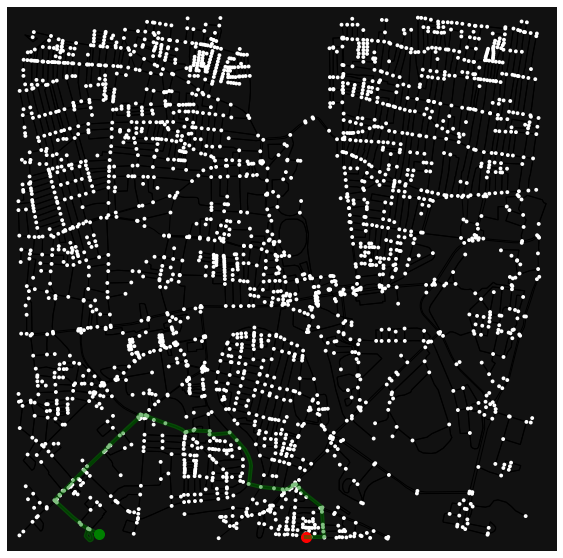

In [50]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(G.nodes[destination]['x'], G.nodes[destination]['y'], c='red', s=100)
ax.scatter(G.nodes[origin]['x'], G.nodes[origin]['y'], c='green', s=100)